PREDICT DATA SERVER

---
Connect to drive


In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


Unzip data

In [2]:
!unzip '/content/drive/My Drive/Colab Notebooks/Final Project/Predict_Server.zip'

Archive:  /content/drive/My Drive/Colab Notebooks/Final Project/Predict_Server.zip
  inflating: sample_submission.csv   
  inflating: test_id.csv             
  inflating: train.csv               


Import library

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


Read data train and data test for predict

In [4]:
df_train = pd.read_csv('/content/train.csv')
df_test = pd.read_csv('/content/test_id.csv')
print(df_train.shape, df_test.shape)

(35544, 5) (2226, 4)


In [5]:
print(df_train.head())
df_train.isnull().sum()

  UPDATE_TIME ZONE_CODE  HOUR_ID  BANDWIDTH_TOTAL  MAX_USER
0  2017-10-01    ZONE01        0     16096.710313  212415.0
1  2017-10-01    ZONE01        1      9374.207907  166362.0
2  2017-10-01    ZONE01        2      5606.225750  146370.0
3  2017-10-01    ZONE01        3      4155.654661  141270.0
4  2017-10-01    ZONE01        4      3253.978594  139689.0


UPDATE_TIME        0
ZONE_CODE          0
HOUR_ID            0
BANDWIDTH_TOTAL    0
MAX_USER           0
dtype: int64

In [6]:
df_test.head()

,id,UPDATE_TIME,ZONE_CODE,HOUR_ID
0,0,2019-03-10,ZONE01,0
1,1,2019-03-10,ZONE01,1
2,2,2019-03-10,ZONE01,2
3,3,2019-03-10,ZONE01,3
4,4,2019-03-10,ZONE01,4


In [7]:
Zone_label = sorted(set(df_train['ZONE_CODE'].values))
print(Zone_label)

for i in range(len(Zone_label)):
  df_train = df_train.replace(Zone_label[i], i)

df_train

['ZONE01', 'ZONE02', 'ZONE03']


,UPDATE_TIME,ZONE_CODE,HOUR_ID,BANDWIDTH_TOTAL,MAX_USER
0,2017-10-01,0,0,16096.710313,212415.0
1,2017-10-01,0,1,9374.207907,166362.0
2,2017-10-01,0,2,5606.225750,146370.0
3,2017-10-01,0,3,4155.654661,141270.0
4,2017-10-01,0,4,3253.978594,139689.0
...,...,...,...,...,...
35539,2019-03-09,2,19,12808.480278,80886.0
35540,2019-03-09,2,20,14242.627076,83385.0
35541,2019-03-09,2,21,16003.524647,83436.0
35542,2019-03-09,2,22,12462.516085,73746.0


,UPDATE_TIME,ZONE_CODE,HOUR_ID,BANDWIDTH_TOTAL,MAX_USER
0,2017-10-01,0,0,16096.710313,212415.0
1,2017-10-01,0,1,9374.207907,166362.0
2,2017-10-01,0,2,5606.225750,146370.0
3,2017-10-01,0,3,4155.654661,141270.0
4,2017-10-01,0,4,3253.978594,139689.0
...,...,...,...,...,...
35491,2019-03-09,0,19,115117.947467,1005465.0
35492,2019-03-09,0,20,130244.830115,1042185.0
35493,2019-03-09,0,21,139899.045695,1062228.0
35494,2019-03-09,0,22,134567.779787,1011024.0


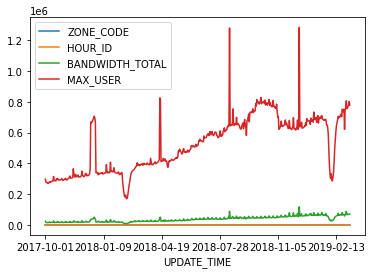

In [8]:
zOne1 = df_train[df_train.ZONE_CODE == 0]
zOne1_grby = zOne1.groupby('UPDATE_TIME').mean()
zOne1_grby.plot()
zOne1

Create Model

In [9]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(32, activation='relu', input_shape=(3, 1)))
# model.add(tf.keras.layers.LSTM(16, activation='relu'))
# model.add(tf.keras.layers.LSTM(8, activation='relu'))
model.add(tf.keras.layers.Dense(1))

model.compile(optimizer='adam', loss='mse', metrics='accuracy')

epoch = 100

Create train for Zone 01 with predict bandwidth_total

In [10]:
# X_train = zOne1.drop(['BANDWIDTH_TOTAL', 'MAX_USER'], axis=1).values
# y_train = zOne1.drop(['UPDATE_TIME', 'ZONE_CODE', 'HOUR_ID'], axis=1).values
# print(X_train.shape, y_train.shape)

X = zOne1.drop(['BANDWIDTH_TOTAL', 'UPDATE_TIME'], axis=1).values
y = zOne1.drop(['UPDATE_TIME', 'MAX_USER', 'ZONE_CODE', 'HOUR_ID'], axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, y_train.shape)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
print(X_train.shape)
# X_train.head()

(8802, 3) (8802, 1)
(8802, 3, 1)


In [11]:
predict_zone01 = model.fit(X_train, y_train, epochs=epoch, verbose=1)

Epoch 1/100
276/276 [==============================] - 1s 2ms/step - loss: 279733120.0000 - accuracy: 0.0000e+00
Epoch 2/100
276/276 [==============================] - 1s 2ms/step - loss: 232599328.0000 - accuracy: 0.0000e+00
Epoch 3/100
276/276 [==============================] - 1s 2ms/step - loss: 219587856.0000 - accuracy: 0.0000e+00
Epoch 4/100
276/276 [==============================] - 1s 2ms/step - loss: 214887072.0000 - accuracy: 0.0000e+00
Epoch 5/100
276/276 [==============================] - 1s 2ms/step - loss: 203065568.0000 - accuracy: 0.0000e+00
Epoch 6/100
276/276 [==============================] - 1s 2ms/step - loss: 194229600.0000 - accuracy: 0.0000e+00
Epoch 7/100
276/276 [==============================] - 1s 2ms/step - loss: 164913792.0000 - accuracy: 0.0000e+00
Epoch 8/100
276/276 [==============================] - 1s 2ms/step - loss: 142571904.0000 - accuracy: 0.0000e+00
Epoch 9/100
276/276 [==============================] - 1s 2ms/step - loss: 126598976.0000 - accu

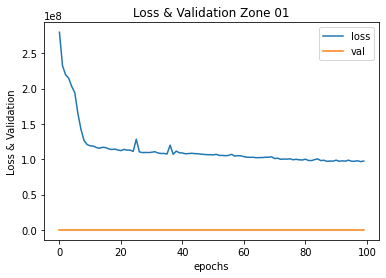

In [12]:
plt.plot(predict_zone01.history['loss'])
plt.plot(predict_zone01.history['accuracy'])
plt.title('Loss & Validation Zone 01')
plt.xlabel('epochs')
plt.ylabel('Loss & Validation')
plt.legend(['loss', 'val'], loc='upper right')
plt.show()

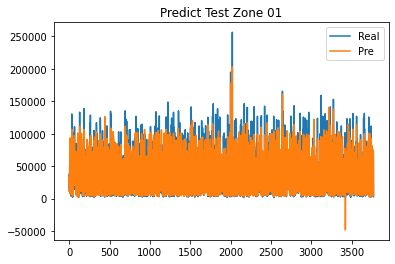

In [13]:
plt.plot(y_test)
plt.plot(predict_zone01.model.predict(X_test))
plt.title('Predict Test Zone 01')
plt.legend(['Real', 'Pre'], loc='upper right')
plt.show()

Create train for zone 02

(7644, 3) (7644, 1)
(7644, 3, 1)


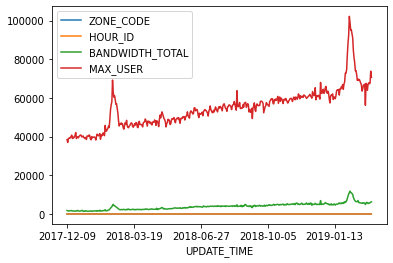

In [14]:
zOne2 = df_train[df_train.ZONE_CODE == 1]
zOne2_grby = zOne2.groupby('UPDATE_TIME').mean()
zOne2_grby.plot()

X = zOne2.drop(['BANDWIDTH_TOTAL', 'UPDATE_TIME'], axis=1).values
y = zOne2.drop(['UPDATE_TIME', 'MAX_USER', 'ZONE_CODE', 'HOUR_ID'], axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, y_train.shape)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
print(X_train.shape)

In [15]:
predict_zone02 = model.fit(X_train, y_train, epochs=epoch, verbose=1)

Epoch 1/100
239/239 [==============================] - 1s 2ms/step - loss: 28431856.0000 - accuracy: 0.0000e+00
Epoch 2/100
239/239 [==============================] - 1s 2ms/step - loss: 5376477.5000 - accuracy: 0.0000e+00
Epoch 3/100
239/239 [==============================] - 1s 2ms/step - loss: 4107580.5000 - accuracy: 0.0000e+00
Epoch 4/100
239/239 [==============================] - 1s 2ms/step - loss: 3555529.7500 - accuracy: 0.0000e+00
Epoch 5/100
239/239 [==============================] - 1s 2ms/step - loss: 3307285.5000 - accuracy: 0.0000e+00
Epoch 6/100
239/239 [==============================] - 1s 2ms/step - loss: 3144171.7500 - accuracy: 0.0000e+00
Epoch 7/100
239/239 [==============================] - 1s 2ms/step - loss: 3678160.7500 - accuracy: 0.0000e+00
Epoch 8/100
239/239 [==============================] - 1s 2ms/step - loss: 3145261.0000 - accuracy: 0.0000e+00
Epoch 9/100
239/239 [==============================] - 1s 2ms/step - loss: 2895977.5000 - accuracy: 0.0000e+00


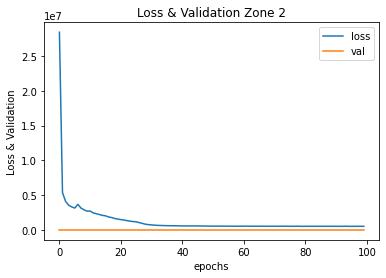

In [16]:
plt.plot(predict_zone02.history['loss'])
plt.plot(predict_zone02.history['accuracy'])
plt.title('Loss & Validation Zone 2')
plt.xlabel('epochs')
plt.ylabel('Loss & Validation')
plt.legend(['loss', 'val'], loc='upper right')
plt.show()

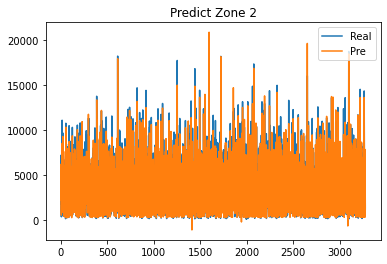

In [17]:
plt.plot(y_test)
plt.plot(predict_zone02.model.predict(X_test))
plt.title('Predict Zone 2')
plt.legend(['Real', 'Pre'], loc='upper right')
plt.show()

Create train for zone 03

(8433, 3) (8433, 1)
(8433, 3, 1)


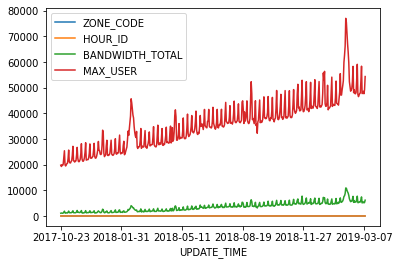

In [18]:
zOne3 = df_train[df_train.ZONE_CODE == 2]
zOne3_grby = zOne3.groupby('UPDATE_TIME').mean()
zOne3_grby.plot()

X = zOne3.drop(['BANDWIDTH_TOTAL', 'UPDATE_TIME'], axis=1).values
y = zOne3.drop(['UPDATE_TIME', 'MAX_USER', 'ZONE_CODE', 'HOUR_ID'], axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, y_train.shape)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
print(X_train.shape)

In [19]:
predict_zone03 = model.fit(X_train, y_train, epochs=epoch, verbose=1)

Epoch 1/100
264/264 [==============================] - 1s 2ms/step - loss: 565969.7500 - accuracy: 0.0000e+00
Epoch 2/100
264/264 [==============================] - 1s 2ms/step - loss: 396577.2812 - accuracy: 0.0000e+00
Epoch 3/100
264/264 [==============================] - 1s 2ms/step - loss: 364295.8438 - accuracy: 0.0000e+00
Epoch 4/100
264/264 [==============================] - 1s 2ms/step - loss: 339260.8125 - accuracy: 0.0000e+00
Epoch 5/100
264/264 [==============================] - 1s 2ms/step - loss: 322194.6875 - accuracy: 0.0000e+00
Epoch 6/100
264/264 [==============================] - 1s 2ms/step - loss: 316039.0312 - accuracy: 0.0000e+00
Epoch 7/100
264/264 [==============================] - 1s 2ms/step - loss: 310116.9062 - accuracy: 0.0000e+00
Epoch 8/100
264/264 [==============================] - 1s 2ms/step - loss: 306990.5312 - accuracy: 0.0000e+00
Epoch 9/100
264/264 [==============================] - 1s 2ms/step - loss: 307625.3125 - accuracy: 0.0000e+00
Epoch 10/1

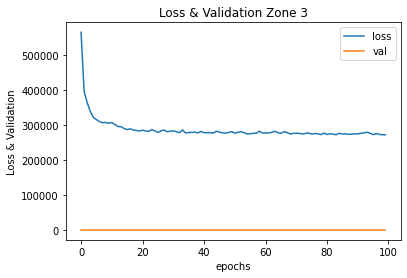

In [20]:
plt.plot(predict_zone03.history['loss'])
plt.plot(predict_zone03.history['accuracy'])
plt.title('Loss & Validation Zone 3')
plt.xlabel('epochs')
plt.ylabel('Loss & Validation')
plt.legend(['loss', 'val'], loc='upper right')
plt.show()

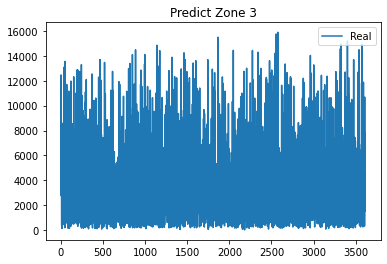

In [22]:
plt.plot(y_test)
# plt.plot(predict_zone03.model.predict(X_test))
plt.title('Predict Zone 3')
plt.legend(['Real', 'Pre'], loc='upper right')
plt.show()